In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("wine-quality-white-and-red.csv")
print(df.head())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None


In [5]:
print(df.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000         

Jag skapar ett histogram med alla variablar för att få en överblick över datasetet. De flesta kemiska egenskaper uppvisar en relativt summetrisk eller något skev fördelning så jag drar slutsatsen att datasetet är välbalanserat. Den variabel som sticker ut mest skulle jag säga är quality, och baserat på hur histogrammet för den ser ut gissar jag att det finns mycket färre exempel på väldigt bra eller väldigt dåliga viner. 

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

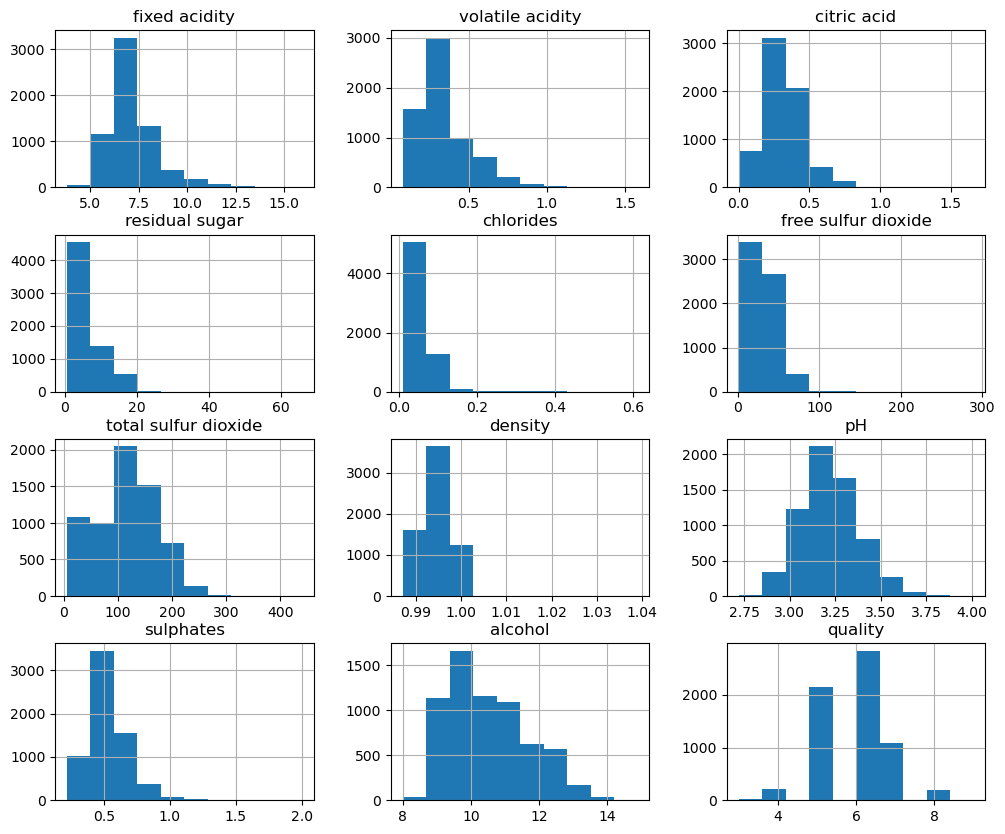

In [6]:
df.hist(figsize=(12, 10))

### Boxplot: alcohol vs type
Jag gör en boxplot av alcohol grupperad efter type för att undersöka om det finns några skillnader i alkoholhalten mellan de röda och vita vinerna vilket jag tyckte kändes relevant.
Det jag ser med boxploten är att de röda vinerna i genomsnitt har högre alkoholhalt än de vita, däremot ser jag också att de vita vinerna har aningen större spridning i alkoholnivåera. Allt detta tycker jag är en bra motivering till att type kan vara en väldigt relevant variabel att inkludera i modellen. 

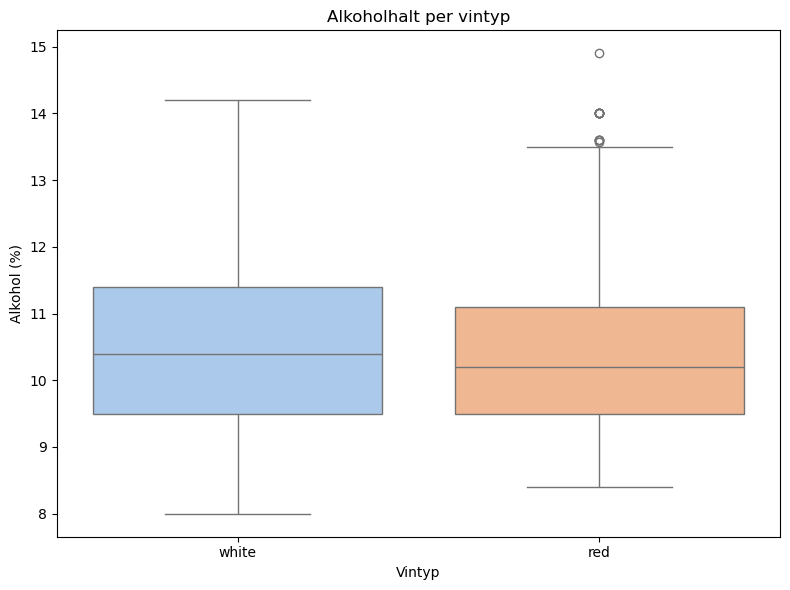

In [8]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="type", y="alcohol", hue="type", palette="pastel", legend=False)

plt.title("Alkoholhalt per vintyp")
plt.xlabel("Vintyp")
plt.ylabel("Alkohol (%)")
plt.tight_layout()
plt.show()

### Boxplot all inclusive
För att få en överblick av alla variablar för att se om jag hittar något mer intressant gjorde jag en boxplot för varje kemisk variabel grupperad efter quality då det känns logiskt att just quality är något en användre/person vill grunda sina val på till stor del. Här får vi tex se att alcohol, volatile acidity och sulphates varierar systematiskt med kvalitet - alltså dom ökar eller minskar stegvis och inte slumpmässigt. Jag kan då anta att även dessa kommer ha stor betydelse i min slutgiltiga modell. 


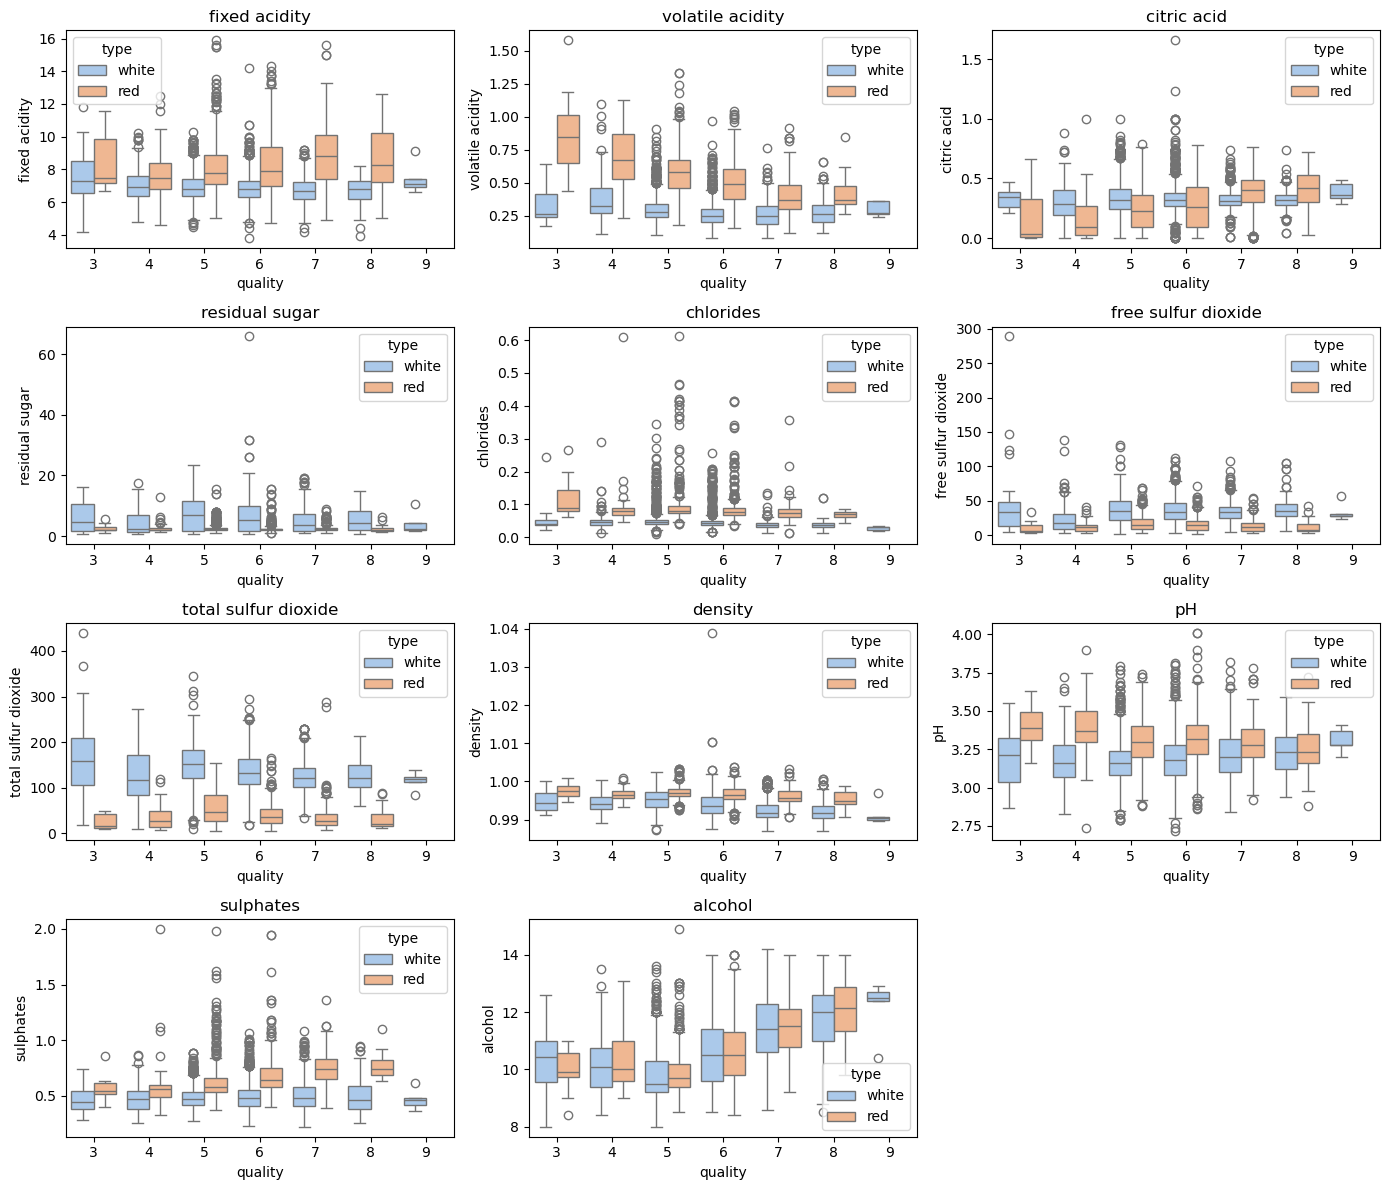

In [11]:
numeric_features = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
    'density', 'pH', 'sulphates', 'alcohol'
]

plt.figure(figsize=(14, 12))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=df, x='quality', y=col, hue="type", palette='pastel')
    plt.title(col)
plt.tight_layout()
plt.show()

### Korrelationsmatris
Jag plottar även upp en heatmap för att kunna se mer exakt korrelation mellan variablarna för att ännu tydligare kunna se mönster. Tex att alkohol är positivt korrelerad med kvalite (0.44) och volatile acidity är negativ (-0.27).

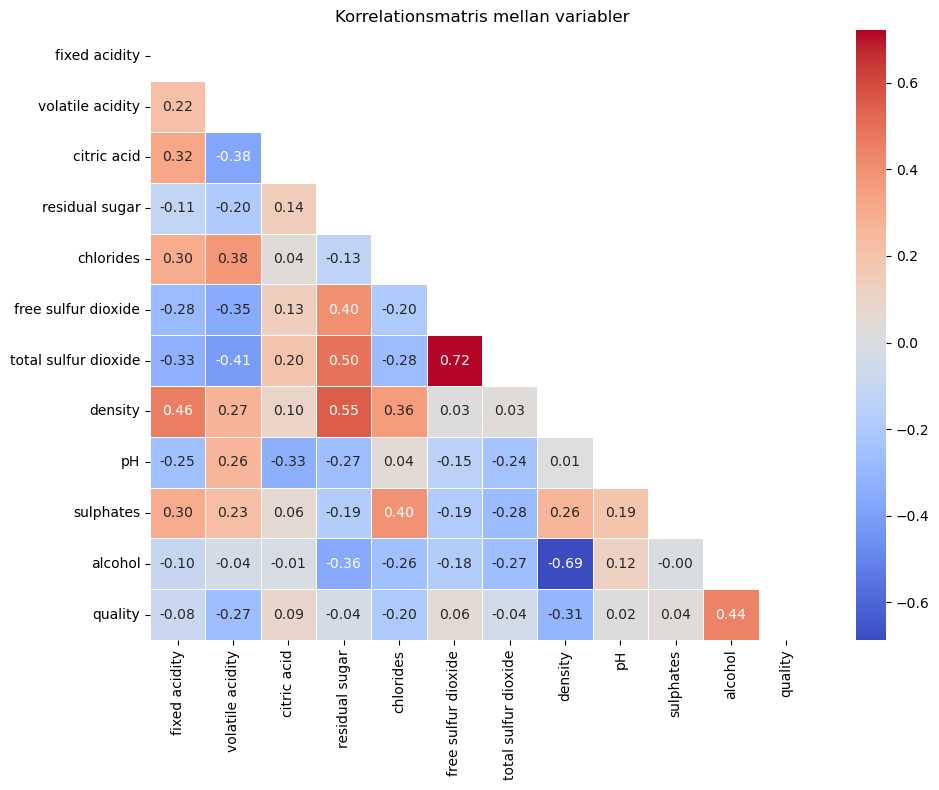

In [12]:
# Beräkna korrelationer (endast numeriska kolumner)
corr = df.corr(numeric_only=True)

# Tar bort dubletter/spegelbild
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5
)

plt.title("Korrelationsmatris mellan variabler")
plt.tight_layout()
plt.show()

### Scatterplot: alcohol vs quality

Syftet med denna är att vidare undersöka om det finns ett positivt samband melan alkoholhalten och vinets kvalite som vi tidigare sett i boxplotten samt heatmapen.

#### Analys
Diagrammet visar en tydlig positiv trend där viner med högre alkoholhalt oftast får högra kvalitetsbetyg. Punkternas lutning stärker på de systematiska samband vi kunde se i korrelationsmatrisen.

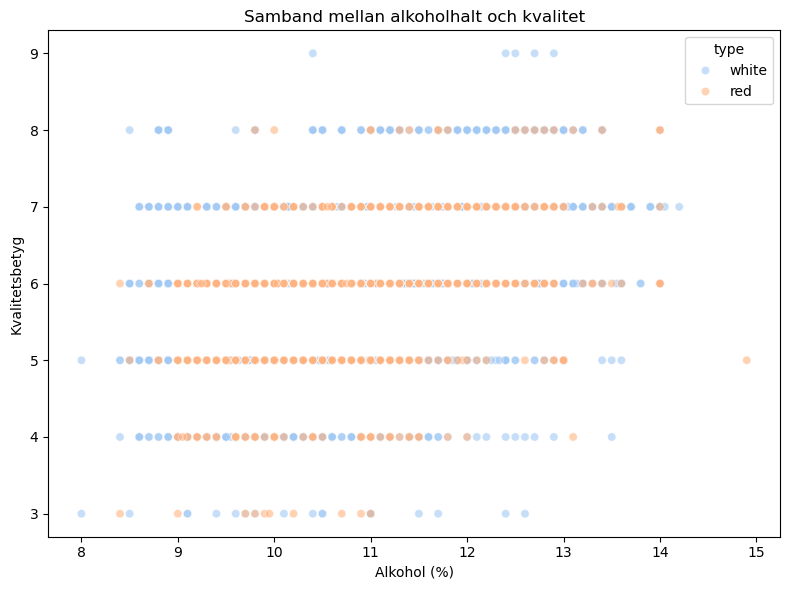

In [13]:

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="alcohol", y="quality", hue="type", alpha=0.6, palette="pastel")

plt.title("Samband mellan alkoholhalt och kvalitet")
plt.xlabel("Alkohol (%)")
plt.ylabel("Kvalitetsbetyg")
plt.tight_layout()
plt.show()

### Scatterplot: volatile acidity vs quality
Syftet med denna scatterplot är att undersöka om volatile acidity(högre flyktig syra) har en negativ effekt på kvaliten eller inte. Hög flyktig syra verkar oftast betyda att ett vin är surt vilket här är något negativt.
Jag väljer även att fokusera på just volatile acidity och inte density även om density i heatmapen hade mer negativ korrelation mot quality, detta med anledningen att acohol vs density låg på -0.69 så dom är väldigt nära varandra. Därför utesluter jag den när jag ändå valt att använda mig av just alcohol redan.

#### Analys
Diagrammet visar en tydlig negativ trend där viner med högre halter av flyktig syra oftast har lägre kvalitetsbetyg vilket jag antog skulle ske baserat på korrelationsmatrisen där den hade en stark negativ korrelation mot quality.

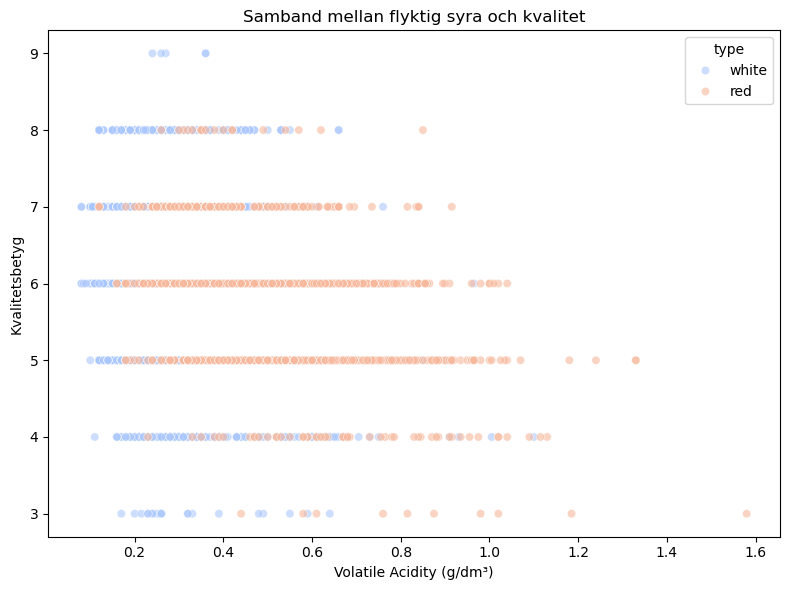

In [14]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="volatile acidity", y="quality", hue="type", alpha=0.6, palette="coolwarm")

plt.title("Samband mellan flyktig syra och kvalitet")
plt.xlabel("Volatile Acidity (g/dm³)")
plt.ylabel("Kvalitetsbetyg")
plt.tight_layout()
plt.show()

#### Samanfattning:
Både alcohol och volatile acidity visar starka och systematiska samband med vinets kvalite men i motsatt riktning. Jag fick se det väldigt tydligt redan i början men har nu även försäkrat mig om att det är två viktiga variablar för modellen. Alkoholhalten påverkar betyget positivt medan hög flyktig syra påverkar det negativt.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

## Modellering: Regression. Förutsäg quality som numerisk variabel

Här nedanför i regressionsdelen testar jag tre modeller för att förutse vinest kvalitetsbetyg som ett kontinuerligt värde. Jag gjorde en Linear regression, random forest samt gradient boosting.
- Linear regression hade lägst prestanda med R2=0.33, förmodligen då en simpel linjär modell inte kan fånga dom icke-länjära sambanden i datasetet.
- Random forest och Gradiant boosting hade betydligt högre förklaringsgrad med R2=0.50 och 0.53, samt lägre felvärden (RMSE) = 0.58 och 0.60.

Jag väljer då att använda mig av Gradient boosting som slutlig modell baserat på dess prestanda som visar sig bäst. 

In [27]:
# Separera features och target
X = df.drop(columns=["quality"])
y = df["quality"]

# One-hot encode 'type' (röd/vit)
X = pd.get_dummies(X, columns=["type"], drop_first=True)

# Dela upp i train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skala numeriska features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    
    results[name] = {
        "MAE": mean_absolute_error(y_test, preds),
        "RMSE": np.sqrt(mean_squared_error(y_test, preds)),
        "R2": r2_score(y_test, preds)
    }

pd.DataFrame(results).T

,MAE,RMSE,R2
Linear Regression,0.545518,0.687050,0.339623
Random Forest,0.403396,0.562822,0.556843
Gradient Boosting,0.513874,0.647283,0.413856


## Modellering: Klassifikation, förutsäg kvalitetsklass

Här tränade jag tre klassificerare: Logistic regression, random forest och gradient boosting. För klassifikationen delades kvalitetsbetyget upp i tre kategorier som var low(3-5), medium (6-7) och high (8-10).
- Logistic regression användes som baseline och nådde en F1-score på 0.69, så jag tycker inte att den är tillräcklig för att särskilja kvalitetsnivåerna.
- Random forest presterade bäst med en F1-score på 0.80 och även en hög precision på 0.81.
- Gradient boostingpresterade lite mitt emellan med en F1-score på 0.73, alltså bättre än Logistic men inte bäst.
Confusion Matrix visar att majoriteten av felen sker mellan medium och high, vilket var väntat då dessa klasser är mest lika kemiskt. Utefter det här drar jag slutsatsen att Random Forest classifier är den mest träffsäkra modellen jag gjort hittills.

,Accuracy,Precision,Recall,F1
Model,,,,
Logistic Regression,0.712,0.688,0.712,0.694
Random Forest,0.809,0.811,0.809,0.803
Gradient Boosting,0.748,0.733,0.748,0.734


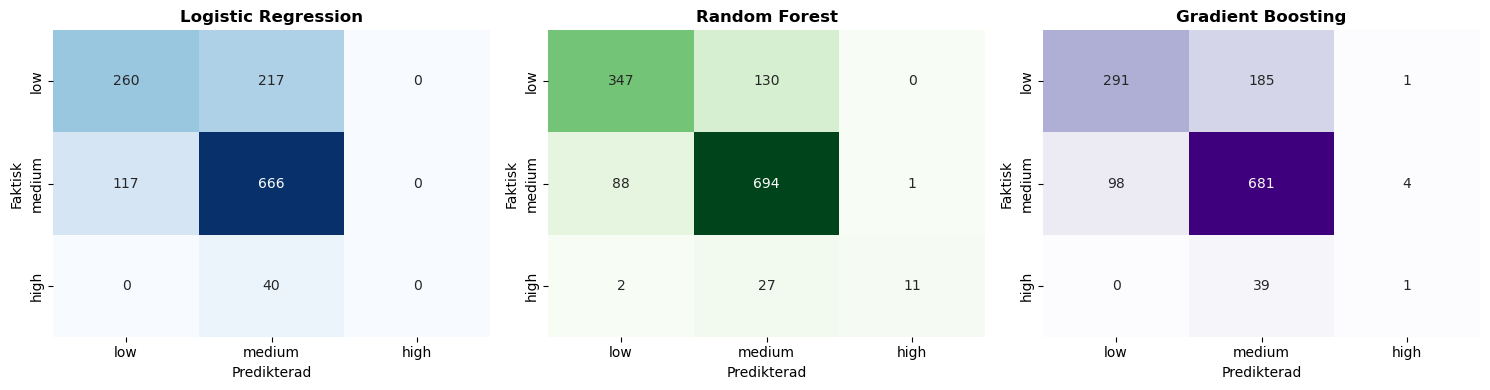

In [30]:
# Skapa kvalitetsklasser
df_cls = df.copy()
df_cls["quality_label"] = pd.cut(
    df_cls["quality"],
    bins=[0, 5, 7, 10],
    labels=["low", "medium", "high"],
    include_lowest=True
)

# Features och target
X = df_cls.drop(columns=["quality", "quality_label"])
X = pd.get_dummies(X, columns=["type"], drop_first=True)
y = df_cls["quality_label"]

# Train/test-split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Skalning
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s  = scaler.transform(X_test)

# Modeller
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=300, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

cms = {}
results = []

for name, mdl in models.items():
    mdl.fit(X_train_s, y_train)
    y_pred = mdl.predict(X_test_s)
    
    acc = accuracy_score(y_test, y_pred)
    prec, rec, f1, _ = precision_recall_fscore_support(
        y_test, y_pred, average="weighted", zero_division=0
    )
    cms[name] = confusion_matrix(y_test, y_pred, labels=["low","medium","high"])
    results.append({"Model": name, "Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1})

results_df = pd.DataFrame(results).set_index("Model").round(3)
display(results_df)

# Plotta konfusionsmatriser
labels = ["low","medium","high"]
colors = {
    "Logistic Regression": "Blues",
    "Random Forest": "Greens",
    "Gradient Boosting": "Purples"
}

fig, axes = plt.subplots(1, len(models), figsize=(15,4))

for ax, (name, cm) in zip(axes, cms.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap=colors[name], cbar=False,
                xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_title(name, fontsize=12, fontweight="bold")
    ax.set_xlabel("Predikterad")
    ax.set_ylabel("Faktisk")

plt.tight_layout()
plt.show()

### Testar optimering: GridSerach för Random Forest


In [49]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, classification_report

In [50]:
RANDOM_STATE = 42

pipe = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("rf", RandomForestClassifier(random_state=RANDOM_STATE))
])

param_grid = {
    "rf__n_estimators": [200, 300, 400],
    "rf__max_depth": [None, 20, 30],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 4],
    "rf__max_features": ["sqrt", "log2"]
}

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=RANDOM_STATE)

grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    verbose=0,
    refit=True   # refittar på hela train med bästa params
)

grid.fit(X_train, y_train)  # OBS: X_train/y_train o-skalade (Pipeline sköter skalning inom CV)

cv_mean = grid.best_score_
best_params = grid.best_params_

y_pred_test = grid.predict(X_test)
test_f1 = f1_score(y_test, y_pred_test, average="weighted")

print("Bästa CV-F1 (mean over folds):", round(cv_mean, 3))
print("Test-F1 med bästa modellen:", round(test_f1, 3))
print("Bästa parametrar:", best_params)
print("\nTESTRAPPORT:\n", classification_report(y_test, y_pred_test, zero_division=0))

Bästa CV-F1 (mean over folds): 0.8
Test-F1 med bästa modellen: 0.798
Bästa parametrar: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}

TESTRAPPORT:
               precision    recall  f1-score   support

        high       0.92      0.28      0.42        40
         low       0.79      0.72      0.75       477
      medium       0.81      0.89      0.85       783

    accuracy                           0.80      1300
   macro avg       0.84      0.63      0.67      1300
weighted avg       0.81      0.80      0.80      1300



In [33]:
best_rf = grid_search.best_estimator_

# Testa på testdatan
y_pred_best = best_rf.predict(X_test_s)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_best))


              precision    recall  f1-score   support

        high       0.85      0.28      0.42        40
         low       0.80      0.73      0.76       477
      medium       0.82      0.89      0.85       783

    accuracy                           0.81      1300
   macro avg       0.82      0.63      0.68      1300
weighted avg       0.81      0.81      0.81      1300



#### Analys för GridSearchCv
I ett försök att förbättra Random Forest-modellen genomfördes en hyperparameteroptimering med GridSearch. Parametrar som testades var antalet träd (n_estimators), trädens maximala djup (max_depth), samt kriterier för delning och löv (min_samples_split, min_samples_leaf).
Optimeringen utfördes i en Pipeline tillsammans med en StandarsScaler och korsvaliderades med ett 5x2 Repeated Straified KFold-upplägg. 
Resultatet visade genomsnittlig F1-score på 0.7999 under korsvalideringen och 0.798 på testdatan. I jämförelse med baseline-modellen (F1=0.803) innebar detta ingen egentlig förbättring så den ursprungliga modellen är fortfarande den bästa.

Små skillnader mellan CV och test tyder på god generaliseringsförmåga och att modellen är stabil.
Grid Search bekräftade därmed att Random Forest är en välbalanserad modell för datasetet, men att vidare optimering inte gav signifikant vinst i noggrannhet.

### Testar optimering: Randomized Search för Random Forest
Efter första GridSearchen vill jag prova en Randomized Search för att effektivt utforska ett större parameterutrymme utan att behöva testa alla kombinationer. Detta med förhoppning till att kunna förbättra min modell.

In [51]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from scipy.stats import randint, uniform
from scipy.stats import randint, uniform
import time

In [55]:
RANDOM_STATE = 42

# Utgå gärna från gridens bästa parametrar (ersätt värdena nedan när du har dem)
best_from_grid = grid.best_params_
print("Grid best params:", best_from_grid)

# 2) Definiera sökfördelningar (runt gridens bästa värden om du vill snäva av)
param_distributions = {
    "rf__n_estimators": randint(350, 500),      # kring 400, ±50
    "rf__max_depth": [None, 20, 25, 30, 35],    # inkludera None och några nära värden
    "rf__min_samples_split": randint(2, 6),     # nära 2 (mycket små träd)
    "rf__min_samples_leaf": randint(1, 3),      # nära 1
    "rf__max_features": ["sqrt", "log2"],       # 'sqrt' var bäst, men prova log2 också
    "rf__bootstrap": [True],
}

rnd = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_distributions,
    n_iter=100,
    scoring="f1_weighted",
    cv=cv,
    n_jobs=-1,
    random_state=RANDOM_STATE,
    verbose=1,
    refit=True
)

t0 = time.time()
rnd.fit(X_train, y_train)
t1 = time.time()

cv_mean_rnd = rnd.best_score_
best_params_rnd = rnd.best_params_

y_pred_test_rnd = rnd.predict(X_test)
test_f1_rnd = f1_score(y_test, y_pred_test_rnd, average="weighted")

print("\n[Randomized] Bästa CV-F1:", round(cv_mean_rnd, 3))
print("[Randomized] Test-F1:", round(test_f1_rnd, 3))
print("[Randomized] Bästa parametrar:", best_params_rnd)
print(f"[Randomized] Körtid: {t1 - t0:.1f}s")

print("\nTESTRAPPORT (Randomized):\n",
      classification_report(y_test, y_pred_test_rnd, zero_division=0))

Grid best params: {'rf__max_depth': None, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 400}
Fitting 10 folds for each of 100 candidates, totalling 1000 fits

[Randomized] Bästa CV-F1: 0.801
[Randomized] Test-F1: 0.799
[Randomized] Bästa parametrar: {'rf__bootstrap': True, 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 3, 'rf__n_estimators': 445}
[Randomized] Körtid: 285.7s

TESTRAPPORT (Randomized):
               precision    recall  f1-score   support

        high       0.92      0.28      0.42        40
         low       0.79      0.72      0.75       477
      medium       0.81      0.88      0.84       783

    accuracy                           0.80      1300
   macro avg       0.84      0.63      0.67      1300
weighted avg       0.81      0.80      0.80      1300



### Analys för Randomized Search
Totalt testades 100 slumpmässiga kombinationer av hyperparametrar, inklusive variationer i max_depth, min_samples_split, max_features och n_estimators. 
Resultaten visade en genomsnittlig F1-score på 0.799 under korsvalidering och 0.795 på testsetet, vilket är mycket nära GridSearch resultaten. 

Den här sökningen tog längre tid (4 min) utan att ge någon prestandaförbättring. Detta tolkar jag som att modellen redan är nära sin optimala punkt och att vidare optimering inte är nödvändig eller kommer ge någon matnyttigt.

In [61]:
from sklearn.metrics import f1_score

models_to_compare = {
    "Baseline RF": RandomForestClassifier(random_state=RANDOM_STATE, n_estimators=300).fit(
        StandardScaler().fit_transform(X_train), y_train
    ),  # enklare baseline (utanför pipeline för snabbhet)

    "Grid RF": grid.best_estimator_,
    "Randomized RF": rnd.best_estimator_,
}

for name, mdl in models_to_compare.items():
    # säkerställ att du predikterar korrekt: pipeline tar X_test, baseline tar skalat
    if name == "Baseline RF":
        y_pred = mdl.predict(StandardScaler().fit(X_train).transform(X_test))
    else:
        y_pred = mdl.predict(X_test)

    f1 = f1_score(y_test, y_pred, average="weighted")
    print(f"{name:>12}: Test F1 = {f1:.3f}")


 Baseline RF: Test F1 = 0.803
     Grid RF: Test F1 = 0.798
Randomized RF: Test F1 = 0.799


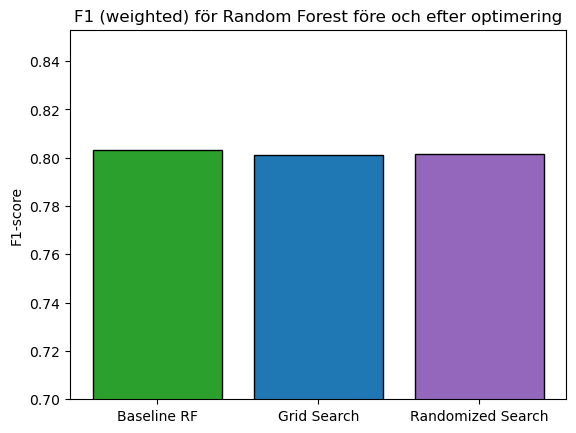

In [62]:
# Jämförelse F1 före/efter
f1_baseline = 0.803     # från din ursprungliga RF
f1_grid = grid_search.best_score_  # från din Grid Search
f1_rand = rnd.best_score_          # från din Randomized Search

plt.bar(["Baseline RF", "Grid Search", "Randomized Search"], 
        [f1_baseline, f1_grid, f1_rand],
        color=["#2ca02c", "#1f77b4", "#9467bd"], edgecolor="black")

plt.title("F1 (weighted) för Random Forest före och efter optimering")
plt.ylabel("F1-score")
plt.ylim(0.7, max(f1_baseline, f1_grid, f1_rand) + 0.05)
plt.show()


### Gemensam avslutning - jämförelse
Efter jämförelse av baseline-modellen med Grid Search- och Randomized Search-versionerna låg samtliga test-F1-värden mellan 0.798 och 0.803.
Skillnaderna är försumbara och visar att modellen är stabil och inte särskilt känslig för små förändringar i hyperparametrar.
Detta tyder på att Random Forest-modellen redan var vältrimmad med standardinställningarna, och vidare optimering gav endast marginella effekter.

Baserat på jämförelsen valdes baseline-modellen som slutlig version inför driftsättning, då den kombinerar hög noggrannhet, kort träningstid och enkelhet i användning. 

#### Slutgiltlig modell
Den slutliga modellen sparades som en Pipeline-fil (wine_rf_pipeline.pkl) innehållande både StandardScaler och Random Forest-modellen.
Detta säkerställer att samma databehandling och skalning används konsekvent vid framtida prediktioner via API:et, vilket minskar risken för inkonsistens mellan träning och produktion.

In [63]:
import joblib

# välj bästa pipeline (GridSearchCV innehåller både scaler + RF)
best_model = grid.best_estimator_

# spara hela pipeline som en .pkl-fil
joblib.dump(best_model, "wine_rf_pipeline.pkl")

print("✅ Modell sparad som wine_rf_pipeline.pkl")


✅ Modell sparad som wine_rf_pipeline.pkl
